PUI2015 - Extra Credit Problem

**DO ELEVATORS IN SUBWAYS PROMOTE AN INCREASE IN ADA AND SENIOR/DISABLED FARE TYPE?**

In [1]:
# import packages needed

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy import stats
import pylab as pl
%pylab inline
import geopandas as gpd
import seaborn as sns
import pysal as ps
import mplleaflet
import shapely.geometry as geom
import networkx as nx
pl.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


LOAD DATA - data is being loaded in six separate csv files that correspond with the diferent access categories (all stations, elevator only, escalator only, either elevator or escalator, both elevator and escalator, neither elevator nor escalator); only Manhattan stations were used

In [2]:
# load all stations

data = pd.read_csv('C:\Users\Maria\SkyDrive\Documents\principles of informatics\extra credit data\ExtraCreditData.csv')

data.head()
data.describe()

,Station_Longitude,Station_Latitude,total_swipes,ADA,Sen_ADA,pADA,pSenADA,tot_routes,ADA.1,elevator,escalators,bus_connection,parks,libraries,hospitals
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,-73.974932,40.768766,2424005.094017,20704.769231,86847.068376,0.009057,0.036005,2.504274,0.2307692,0.282051,0.230769,4.837607,6.632479,1.794872,0.188034
std,0.025969,0.045639,8776767.521389,84493.466370,345224.475686,0.004513,0.012852,1.932588,0.4231372,0.451934,0.423137,4.537121,3.793366,0.960769,0.556027
min,-74.014065,40.703087,138826.000000,1773.000000,6504.000000,0.003393,0.016016,1.000000,False,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,-73.995657,40.730328,637615.000000,5592.000000,23951.000000,0.005846,0.027527,1.000000,0,0.000000,0.000000,2.000000,4.000000,1.000000,0.000000
50%,-73.981628,40.761728,1160243.000000,9397.000000,39143.000000,0.007527,0.033001,2.000000,0,0.000000,0.000000,3.000000,6.000000,2.000000,0.000000
75%,-73.952343,40.800605,1855876.000000,16025.000000,69408.000000,0.011841,0.041057,3.000000,0,1.000000,0.000000,6.000000,9.000000,2.000000,0.000000
max,-73.915279,40.869444,94972959.000000,918570.000000,3749219.000000,0.033921,0.101524,11.000000,True,1.000000,1.000000,27.000000,20.000000,5.000000,4.000000


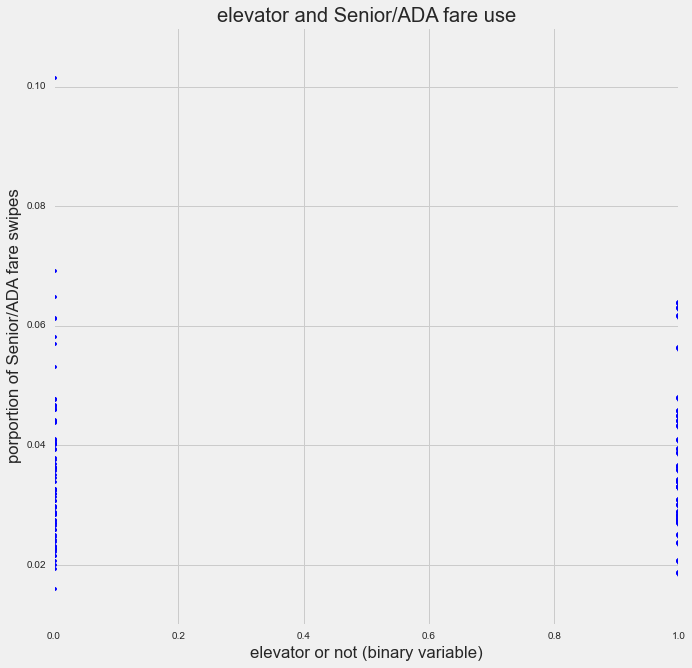

In [3]:
# plot (allbeit not a good one, just looking at data)

figure, ax = pl.subplots(figsize=(10,10))

x = data.elevator
y = data.pSenADA

ax.plot(x, y, 'ob')
ax.set_title('elevator and Senior/ADA fare use')
ax.set_xlabel('elevator or not (binary variable)')
ax.set_ylabel('porportion of Senior/ADA fare swipes')

In [4]:
# elevator only dataset

elevator = pd.read_csv('C:\Users\Maria\SkyDrive\Documents\principles of informatics\extra credit data\ElevatorOnly.csv')

elevator.head()
elevator.describe()

,Station_Longitude,Station_Latitude,total_swipes,ADA,Sen_ADA,pADA,pSenADA,tot_routes,ADA.1,elevator,escalators,bus_connection,parks,libraries,hospitals
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33,33,33.000000,33.000000,33.00,33.000000,33.000000
mean,-73.971880,40.778189,2421064.393939,18774.757576,81022.757576,0.009027,0.036493,3.636364,0.6969697,1,0.393939,6.545455,6.00,1.909091,0.212121
std,0.028509,0.051322,2126058.591157,12793.765845,62320.457296,0.003904,0.011808,2.459906,0.4666937,0,0.496198,5.339071,3.25,1.011300,0.484612
min,-74.014065,40.704817,346583.000000,2542.000000,13001.000000,0.004170,0.018737,1.000000,False,1,0.000000,0.000000,2.00,0.000000,0.000000
25%,-73.993391,40.739777,939532.000000,8378.000000,33712.000000,0.006354,0.028129,2.000000,0,1,0.000000,3.000000,4.00,1.000000,0.000000
50%,-73.981329,40.762456,1821897.000000,16025.000000,66502.000000,0.007527,0.033839,3.000000,1,1,0.000000,5.000000,5.00,2.000000,0.000000
75%,-73.940133,40.814229,2979354.000000,27093.000000,97915.000000,0.011637,0.043207,5.000000,1,1,1.000000,8.000000,8.00,2.000000,0.000000
max,-73.919899,40.868072,9953282.000000,45296.000000,270887.000000,0.020291,0.063867,11.000000,True,1,1.000000,25.000000,16.00,5.000000,2.000000


In [5]:
# calculate percentage of stations in Manhattan with elevators

totalelev = float(len(elevator)) / len(data) 

print 'percentage of stations with elevators:', totalelev

percentage of stations with elevators: 0.282051282051


In [6]:
# load escalator only data

escalator = pd.read_csv('C:\Users\Maria\SkyDrive\Documents\principles of informatics\extra credit data\EscalatorOnly.csv')
escalator.head()

,Station_Name,Line,Station_Name.1,Station_Longitude,Station_Latitude,total_swipes,ADA,Sen_ADA,pADA,pSenADA,tot_routes,ADA.1,elevator,escalators,bus_connection,parks,libraries,hospitals
0,103rd St & Broadway,Broadway-7th Ave,103rd St,-73.968379,40.799446,981445,14306,67983,0.014576,0.069268,1,False,0,0,1,10,1,0
1,103rd St & Central Park West,8 Avenue,103rd St,-73.961454,40.796092,343728,4142,15773,0.012050,0.045888,4,False,0,0,1,6,1,0
2,103rd St & Lexington Ave,Lexington,103rd St,-73.947478,40.790600,898816,10923,36768,0.012153,0.040907,3,False,0,0,3,2,1,0
3,110th St,Lexington,110th St,-73.944250,40.795020,941061,11367,34208,0.012079,0.036350,1,False,0,0,3,9,1,0
4,110th St & Central Park North,Lenox,110th St-Central Park North,-73.951822,40.799075,534777,6492,19412,0.012140,0.036299,2,False,0,0,3,3,1,0


In [7]:
# load stations with both an elevator and an escalator

eeboth = pd.read_csv('C:\Users\Maria\SkyDrive\Documents\principles of informatics\extra credit data\eeboth.csv')

eeboth.head()
eeboth.describe()

,Station_Longitude,Station_Latitude,total_swipes,ADA,Sen_ADA,pADA,pSenADA,tot_routes,ADA.1,elevator,escalators,bus_connection,parks,libraries,hospitals
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13,13,13,13.000000,13.000000,13.000000,13.000000
mean,-73.985397,40.750931,3072761.230769,17599.615385,85985.076923,0.006336,0.029026,4.923077,0.7692308,1,1,7.000000,6.461538,2.230769,0.384615
std,0.019282,0.036253,2857557.808694,14306.672007,78498.111385,0.001688,0.006620,2.928638,0.438529,0,0,6.284903,4.408616,1.300887,0.650444
min,-74.014065,40.704817,479896.000000,2542.000000,13001.000000,0.004170,0.018737,1.000000,False,1,1,0.000000,2.000000,0.000000,0.000000
25%,-73.996204,40.732338,1529007.000000,7884.000000,37207.000000,0.005297,0.027091,3.000000,1,1,1,3.000000,4.000000,2.000000,0.000000
50%,-73.987495,40.751776,1858680.000000,13283.000000,52671.000000,0.005914,0.028338,5.000000,1,1,1,7.000000,4.000000,2.000000,0.000000
75%,-73.976848,40.757552,3233907.000000,19126.000000,93085.000000,0.007363,0.030848,7.000000,1,1,1,8.000000,8.000000,3.000000,1.000000
max,-73.937969,40.851695,9953282.000000,42617.000000,270887.000000,0.009684,0.045700,11.000000,True,1,1,25.000000,16.000000,5.000000,2.000000


In [8]:
# load stations with either an elevator or an escaltor

either = pd.read_csv('C:\Users\Maria\SkyDrive\Documents\principles of informatics\extra credit data\either.csv')

either.head()
either.describe()

,Station_Latitude,Station_Longitude,total_swipes,ADA,Sen_ADA,pADA,pSenADA,tot_routes,ADA.1,elevator,escalators,bus_connection,parks,libraries,hospitals
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,40.769334,-73.974974,2381850.765957,17878.319149,76584.765957,0.008874,0.035048,3.553191,0.5319149,0.702128,0.574468,6.127660,5.744681,3.744681,0.191489
std,0.049398,0.026564,2150902.888629,13273.887121,62408.562062,0.004305,0.011713,2.348066,0.5043749,0.462267,0.499769,5.735538,3.213207,3.060748,0.449071
min,40.703087,-74.014065,262156.000000,2542.000000,12519.000000,0.003535,0.018737,1.000000,False,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,40.728817,-73.993653,971315.500000,7299.500000,33487.500000,0.005857,0.027297,2.000000,0,0.000000,0.000000,3.000000,4.000000,2.000000,0.000000
50%,40.760167,-73.981637,1771493.000000,14797.000000,52671.000000,0.007456,0.032429,3.000000,1,1.000000,1.000000,5.000000,5.000000,2.000000,0.000000
75%,40.807624,-73.955357,2942179.000000,22360.000000,92522.500000,0.011296,0.040496,5.000000,1,1.000000,1.000000,7.500000,7.500000,5.000000,0.000000
max,40.868072,-73.919899,9953282.000000,59100.000000,270887.000000,0.021461,0.063867,11.000000,True,1.000000,1.000000,27.000000,16.000000,14.000000,2.000000


In [9]:
# load stations that have neither an elevator nor an escalator

enone = pd.read_csv('C:\Users\Maria\SkyDrive\Documents\principles of informatics\extra credit data\enone.csv')
enone.head()
enone.describe()

,Station_Latitude,Station_Longitude,total_swipes,ADA,Sen_ADA,pADA,pSenADA,tot_routes,ADA.1,elevator,escalators,bus_connection,parks,libraries,hospitals
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70,70,70,70.000000,70.000000,70.000000,70.000000
mean,40.768384,-73.974904,2452308.714286,22602.528571,93737.471429,0.009181,0.036647,1.800000,0.02857143,0,0,3.971429,7.228571,4.800000,0.185714
std,0.043296,0.025754,11243495.999795,108974.689333,444571.728922,0.004674,0.013609,1.162207,0.1678015,0,0,3.283562,4.051020,3.743981,0.620726
min,40.706476,-74.013783,138826.000000,1773.000000,6504.000000,0.003393,0.016016,1.000000,False,0,0,0.000000,1.000000,0.000000,0.000000
25%,40.730484,-73.996071,584912.500000,4181.250000,18947.750000,0.005867,0.028295,1.000000,0,0,0,2.000000,4.000000,1.000000,0.000000
50%,40.762850,-73.980773,982623.500000,8099.000000,35158.500000,0.007701,0.034802,1.000000,0,0,0,3.000000,7.000000,4.000000,0.000000
75%,40.799353,-73.952285,1596972.500000,12653.500000,50310.000000,0.012043,0.043051,2.000000,0,0,0,5.000000,9.000000,7.000000,0.000000
max,40.869444,-73.915279,94972959.000000,918570.000000,3749219.000000,0.033921,0.101524,6.000000,True,0,0,22.000000,20.000000,15.000000,4.000000


In [10]:
# create dictionary of means to plot against pSenADA

allmeans = {}

allmeans['elevator'] = np.average(elevator.pSenADA)
allmeans['data'] = np.average(data.pSenADA)
allmeans['escalator'] = np.average(escalator.pSenADA)
allmeans['eeboth'] = np.average(eeboth.pSenADA)
allmeans['either'] = np.average(either.pSenADA)
allmeans['enone'] = np.average(enone.pSenADA)

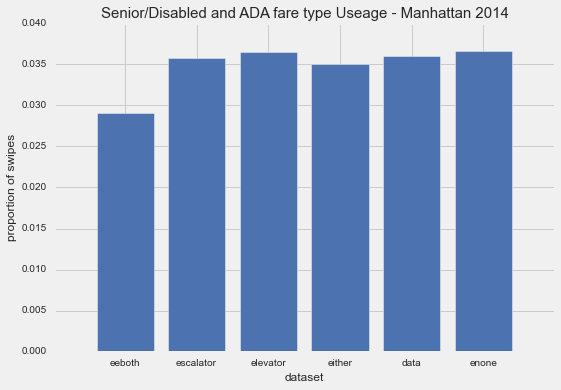

In [11]:

pl.bar(range(len(allmeans)), allmeans.values(), align='center')
pl.xticks(range(len(allmeans)), list(allmeans.keys()), fontsize = 10)
pl.title('Senior/Disabled and ADA fare type Useage - Manhattan 2014', fontsize = 15)
pl.xlabel('dataset', fontsize = 12)
pl.ylabel('proportion of swipes', fontsize = 12)

pl.show()

In [12]:
# calculating Spearman's correlation to see if distribution of stations without elevators or escalators is different from 
# stations with elevators

x = np.random.choice(enone.pSenADA, 33)
np.sort(x)

y = elevator.pSenADA
np.sort(y)

corr = stats.spearmanr(x, y)

corr

(-0.10735788354893022, 0.55206603139621735)

With a p-value greater than rho, the null hpothesis that there is no difference in distributions cannot be rejected

In [13]:
# next four cells from HW3 (probably don't need this one though)

def report_result(p,a):
    print 'is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a)
    if p<a:
        print "YES!"
    else: print "NO!"
    
    print 'the Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected') 

In [14]:
# test to determine difference between no elevators v % of trips on 'either' dataset

#set alpha
alpha=0.05

#proportions
Pelev = np.average(elevator.pSenADA)
Pnone = np.average(enone.pSenADA)

#sample totals
nelev = float(len(elevator)) 
nnone = float(len(enone))

#counts
elev_0 = Pelev * nelev
enone_1 = Pnone * nnone

In [15]:
sp_stdev = lambda p, n: np.sqrt( p * ( 1 - p ) /n[0] +  p * ( 1 - p )/n[1]  )

sp_stdev_2y = sp_stdev((elev_0 + enone_1)/(nelev + nnone), [nelev, nnone])

print "Pelev, elev_0, nnone, stdev", Pelev, elev_0, nnone, sp_stdev_2y

Pelev, elev_0, nnone, stdev 0.0364927235152 1.204259876 70.0 0.0396498673184


In [16]:
zscore = lambda p0, p1, s : (p0 - p1)/s
z_2y = zscore(Pelev, Pnone, sp_stdev_2y)
print z_2y

-0.00388520411603


Using http://www.socscistatistics.com/pvalues/normaldistribution.aspx - 

A z-score of -0.004 yeilds a P-value of 0.996808 which is not significant for a two-tailed normal distribution

**plot different location types**

In [17]:
stations=nx.Graph()
stations.add_nodes_from(data.index)

In [18]:
# plot all locations on map of manhattan

# all stations in Manhattan
StationPos={}
for c in data.index:
    StationPos[c]=(data['Station_Longitude'][c], data['Station_Latitude'][c])

In [19]:
pl.figure(figsize = (10,10))
nx.draw(stations, pos=StationPos, arrows=False, node_size = 20)

mplleaflet.display()

# needs legend

C:\Users\Maria\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [20]:
# adding elevator locations to map

elevators = nx.Graph()
elevators.add_nodes_from(elevator.index)

elevatorPos={}
for c in elevator.index:
    elevatorPos[c]=(elevator['Station_Longitude'][c],elevator['Station_Latitude'][c])

In [21]:
pl.figure(figsize = (10,10))
nx.draw(stations, pos=StationPos, arrows=False, node_size = 20)
nx.draw(elevators, pos=elevatorPos, arrows=False, node_size = 20, node_color = 'b')

mplleaflet.display()

In [22]:
# adding escalator locations to map

escalators = nx.Graph()
escalators.add_nodes_from(elevator.index)

escalatorPos={}
for c in escalator.index:
    escalatorPos[c]=(escalator['Station_Longitude'][c],escalator['Station_Latitude'][c])

In [23]:
pl.figure(figsize = (10,10))

nx.draw(stations, pos=StationPos, arrows=False, node_size = 20)
nx.draw(elevators, pos=elevatorPos, arrows=False, node_size = 20, node_color = 'b')
nx.draw(escalators, pos=escalatorPos, arrows=False, node_size = 20, node_color = 'k')

# pl.legend(loc='upper left')
# pl.title('location of stations with elevators')

mplleaflet.display()

In [24]:
# adding locations with both elvators and escalators to map

both = nx.Graph()
both.add_nodes_from(eeboth.index)

bothPos={}
for c in eeboth.index:
    bothPos[c]=(eeboth['Station_Longitude'][c], eeboth['Station_Latitude'][c])

In [35]:
pl.figure(figsize = (10,10))

nx.draw(stations, pos=StationPos, arrows=False, node_size = 20)
nx.draw(elevators, pos=elevatorPos, arrows=False, node_size = 20, node_color = 'b')
nx.draw(escalators, pos=escalatorPos, arrows=False, node_size = 20, node_color = 'g')
nx.draw(both, pos=bothPos, arrows=False, node_size = 20, node_color = 'k')

mplleaflet.display()

**MAP LEGEND**

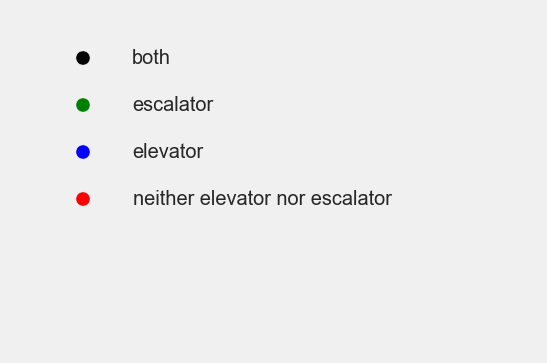

In [36]:
# double-checked color lecture, these seem okay to use in combination

c = ['r', 'b', 'g', 'k']

fig = figure.add_subplot(211)
pl.scatter([0.1], [0.5], s = 200, c = c[0])
pl.text(0.2, 0.5, 'neither elevator nor escalator', fontsize = 20, va = 'center')
pl.xlim(0, 1)


pl.scatter([0.1], [0.51], s = 200, c = c[1])
pl.text(0.2, 0.51, 'elevator', fontsize = 20, va = 'center')
transform = ax.transData

pl.scatter([0.1], [0.52], s = 200, c = c[2])
pl.text(0.2, 0.52, 'escalator', fontsize = 20, va = 'center')
transform = ax.transData

pl.scatter([0.1], [0.53], s = 200, c = c[3])
pl.text(0.2, 0.53, 'both', fontsize = 20, va = 'center')
transform = ax.transData

pl.axis('off');

More data exploration with scatter matrices

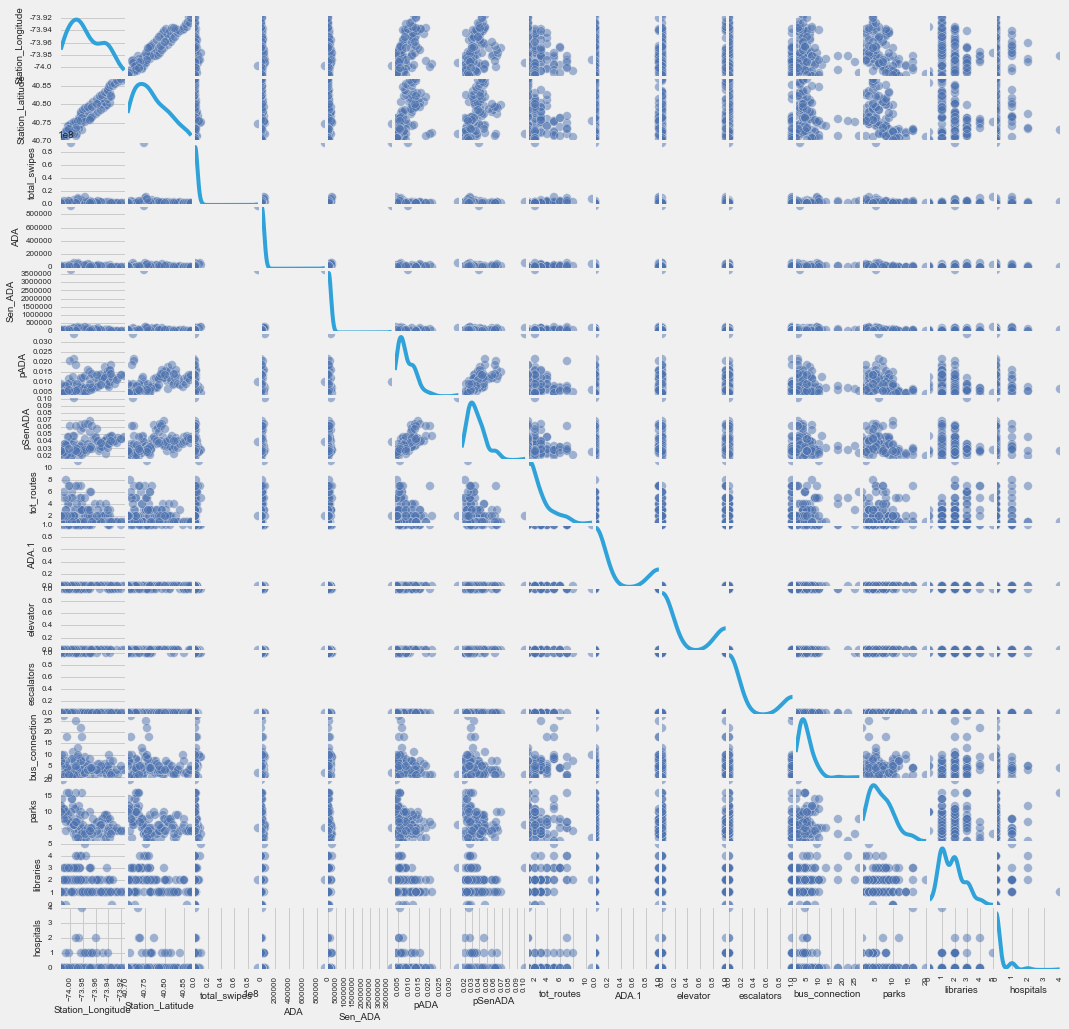

In [37]:
from pandas.tools.plotting import scatter_matrix

# all variables in dataset

scatter_matrix (data, s=300, figsize=(16, 16), diagonal='kde')

pl.rcParams['font.size'] = 8 

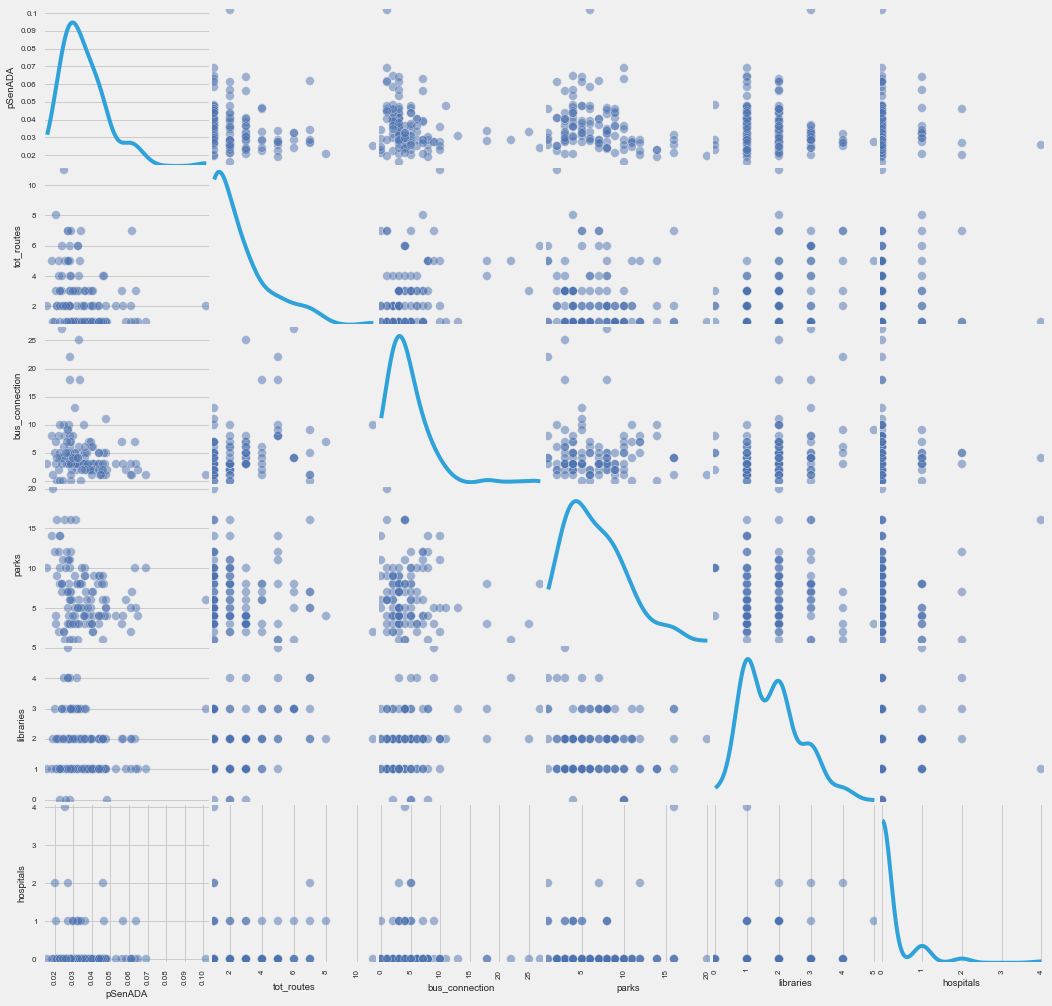

In [55]:
# reviewing only variables used in regression analysis

scatter_matrix (data[['pSenADA', 'tot_routes', 'bus_connection', 'parks', 'libraries', 'hospitals']], s=300, figsize=(16, 16), diagonal='kde')

pl.rcParams['font.size'] = 8 

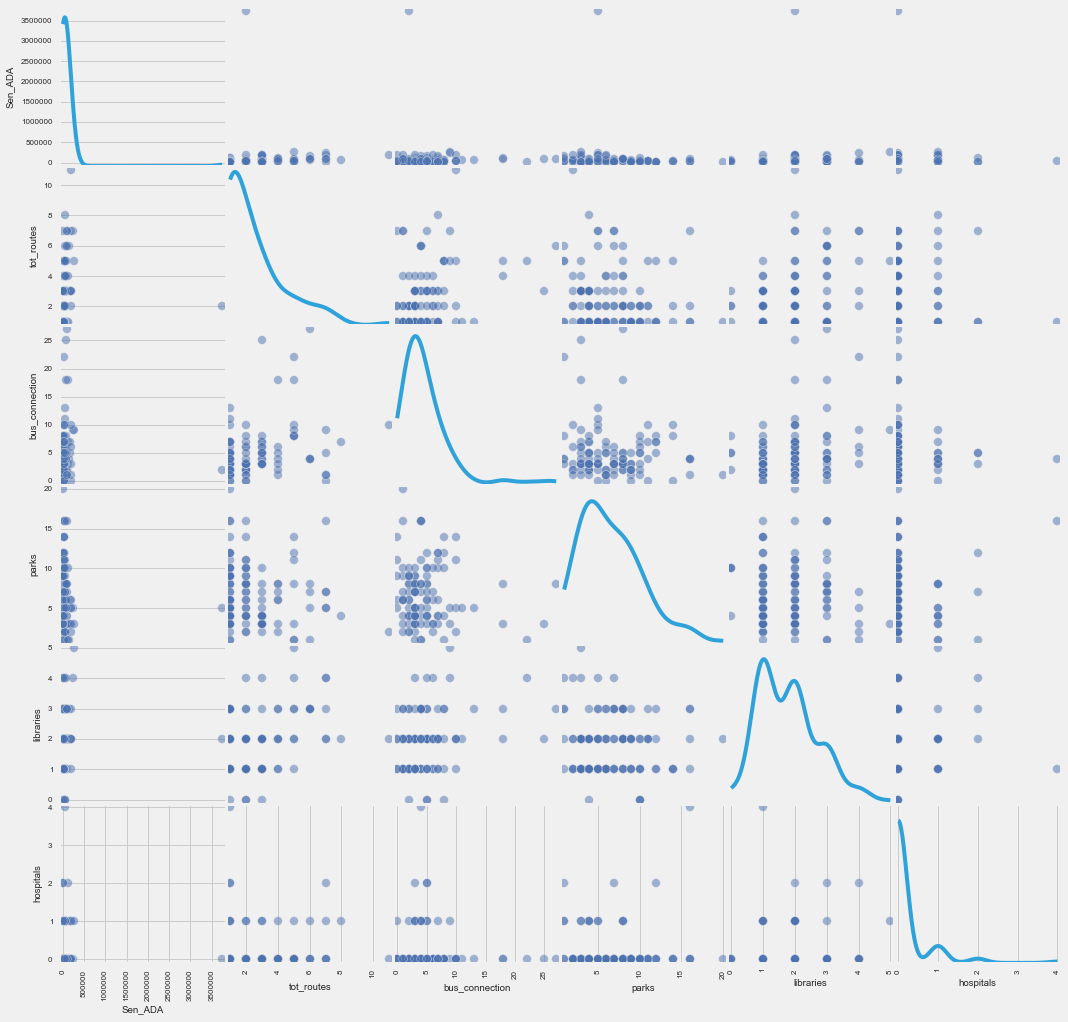

In [56]:
# reviewing indepentant variables and total Senior/ADA fare swipes

scatter_matrix (data[['Sen_ADA', 'tot_routes', 'bus_connection', 'parks', 'libraries', 'hospitals']], s=300, figsize=(16, 16), diagonal='kde')

pl.rcParams['font.size'] = 8 

**Time for regression analysis!**

In [28]:
# first run model with all regressors on all stations

model1 = 'pSenADA ~ tot_routes + bus_connection + parks + libraries + hospitals'
allstops = smf.ols(formula=model1, data = data).fit()

print(allstops.summary())

                            OLS Regression Results                            
Dep. Variable:                pSenADA   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     5.231
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           0.000237
Time:                        12:47:17   Log-Likelihood:                 356.31
No. Observations:                 117   AIC:                            -700.6
Df Residuals:                     111   BIC:                            -684.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0496      0.003     15.

In [29]:
# adjusting model by removing variables with p-value less than 0.05

model1_1 = 'pSenADA ~ tot_routes + bus_connection + parks'
allstops1 = smf.ols(formula=model1_1, data = data).fit()

print(allstops1.summary())

                            OLS Regression Results                            
Dep. Variable:                pSenADA   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     8.733
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           2.94e-05
Time:                        12:47:17   Log-Likelihood:                 356.13
No. Observations:                 117   AIC:                            -704.3
Df Residuals:                     113   BIC:                            -693.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0496      0.003     17.

In [30]:
# run model with elevator only stations

model2 = 'pSenADA ~ tot_routes + bus_connection + parks + libraries + hospitals'
elevonly = smf.ols(formula = model2, data = elevator).fit()

print(elevonly.summary())

                            OLS Regression Results                            
Dep. Variable:                pSenADA   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     1.815
Date:                Tue, 15 Dec 2015   Prob (F-statistic):              0.144
Time:                        12:47:18   Log-Likelihood:                 104.95
No. Observations:                  33   AIC:                            -197.9
Df Residuals:                      27   BIC:                            -188.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0506      0.006      8.

In [31]:
# adjusting model by removing variables with p-value less than 0.05

model2_1 = 'pSenADA ~ tot_routes + bus_connection'
elevonly1 = smf.ols(formula = model2_1, data = elevator).fit()

print(elevonly1.summary())

                            OLS Regression Results                            
Dep. Variable:                pSenADA   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     4.550
Date:                Tue, 15 Dec 2015   Prob (F-statistic):             0.0188
Time:                        12:47:18   Log-Likelihood:                 104.54
No. Observations:                  33   AIC:                            -203.1
Df Residuals:                      30   BIC:                            -198.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0470      0.004     11.

In [33]:
# run model with escalator only stations

model3 = 'pSenADA ~ tot_routes + bus_connection + parks + libraries + hospitals'
esconly = smf.ols(formula = model3, data = escalator).fit()

print(esconly.summary())

                            OLS Regression Results                            
Dep. Variable:                pSenADA   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     4.154
Date:                Tue, 15 Dec 2015   Prob (F-statistic):            0.00213
Time:                        12:47:18   Log-Likelihood:                 254.09
No. Observations:                  84   AIC:                            -496.2
Df Residuals:                      78   BIC:                            -481.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0502      0.004     12.

In [34]:
# run model for stations with both elevators and escalators

model4 = 'pSenADA ~ tot_routes + bus_connection + parks + libraries + hospitals'
eeboth = smf.ols(formula = model4, data = eeboth).fit()

print(eeboth.summary())

                            OLS Regression Results                            
Dep. Variable:                pSenADA   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                 -0.071
Method:                 Least Squares   F-statistic:                    0.8415
Date:                Tue, 15 Dec 2015   Prob (F-statistic):              0.560
Time:                        12:47:18   Log-Likelihood:                 50.363
No. Observations:                  13   AIC:                            -88.73
Df Residuals:                       7   BIC:                            -85.34
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0371      0.007      5.

C:\Users\Maria\Anaconda\lib\site-packages\scipy\stats\stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  int(n))


In [35]:
# run regression with stations that have either elevators or escalators

model5 = 'pSenADA ~ tot_routes + bus_connection + parks + libraries + hospitals'
either = smf.ols(formula = model5, data = either).fit()

print(either.summary())

                            OLS Regression Results                            
Dep. Variable:                pSenADA   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     3.264
Date:                Tue, 15 Dec 2015   Prob (F-statistic):             0.0143
Time:                        12:47:18   Log-Likelihood:                 150.70
No. Observations:                  47   AIC:                            -289.4
Df Residuals:                      41   BIC:                            -278.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0493      0.004     11.

In [36]:
# run model with stations that do not have elevators or escalators

model6 = 'pSenADA ~ tot_routes + bus_connection + parks + libraries + hospitals'
none = smf.ols(formula = model6, data = enone).fit()

print(none.summary())

                            OLS Regression Results                            
Dep. Variable:                pSenADA   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     4.875
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           0.000769
Time:                        12:47:18   Log-Likelihood:                 213.27
No. Observations:                  70   AIC:                            -414.5
Df Residuals:                      64   BIC:                            -401.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0566      0.004     12.

In [37]:
# adjusting model by removing variables with p-value less than 0.05

model6_1 = 'pSenADA ~ tot_routes + bus_connection + parks + libraries'
none1 = smf.ols(formula = model6_1, data = enone).fit()

print(none1.summary())

                            OLS Regression Results                            
Dep. Variable:                pSenADA   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     6.168
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           0.000286
Time:                        12:47:18   Log-Likelihood:                 213.23
No. Observations:                  70   AIC:                            -416.5
Df Residuals:                      65   BIC:                            -405.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0565      0.004     12.

Tried to cluster but ran out of time...

In [93]:
# a = data.pSenADA
# data_matrix = a.as_matrix()
# data_matrix

array([ 0.06926827,  0.04588803,  0.04090715,  0.03635046,  0.03629924,
        0.02655244,  0.03461428,  0.03392743,  0.03257852,  0.03300077,
        0.04008401,  0.04048301,  0.0386946 ,  0.03195471,  0.04320695,
        0.02961343,  0.02255273,  0.03264544,  0.0475973 ,  0.02842674,
        0.04653838,  0.04426584,  0.04076794,  0.04105698,  0.03072941,
        0.03650151,  0.03588169,  0.04569981,  0.03940209,  0.03685567,
        0.04802024,  0.04090782,  0.0257904 ,  0.04401491,  0.04685001,
        0.0394767 ,  0.04770055,  0.03077989,  0.02760136,  0.03917014,
        0.0289412 ,  0.0270824 ,  0.03187987,  0.02737875,  0.03301487,
        0.02816706,  0.01997573,  0.02581134,  0.02812878,  0.02317503,
        0.02775658,  0.0307663 ,  0.03084826,  0.02976272,  0.03631691,
        0.03242888,  0.03421894,  0.02845945,  0.02828468,  0.0249697 ,
        0.06295585,  0.04371562,  0.0440003 ,  0.05627741,  0.04599271,
        0.05821672,  0.02067606,  0.03568238,  0.04016052,  0.06

In [98]:
# clustering - RAN OUT OF TIME TO FINISH THIS
# from sklearn.cluster import KMeans
# from sklearn.cluster import AgglomerativeClustering

# X = np.array(data.pSenADA)
# Y = np.array(data.tot_routes)
# XT = np.append(data.pSenADA).reshape(2, 100).transpose()
# est=KMeans(n_clusters=3,n_init=100) # 100 iterations 
# est.fit(XT)
# labels = est.labels_
# plt.scatter (data.pSenADA,data.tot_routes, s=30,c=labels.astype(np.float),lw=0)
# plt.xlabel('x')
# plt.ylabel('y')


# #K-means clustering; k=3
# kmeans3 = KMeans(n_clusters=3, n_init=100)
# kmeans3.fit(data_matrix)
# labels3 = kmeans3.labels_

# #Calculating cluster centers
# kc3_d = np.zeros((3,230))
# kc3_m = np.zeros((3,230,20))
# kc3 = np.zeros((3,20))

# for k in range(3):
    
#     for i in range(230):
#         if labels3[i] == k:
#             kc3_d[k][i] = 1
#         else:
#             kc3_d[k][i] = 0

#     for a in range(20):        
#         for b in range(230):
#             kc3_m[k][b][a] = kc3_d[k][b]*data_matrix[b][a]

#     for i in range(20):
#         kc3[k][i] = map(sum, kc3_m[k].transpose())[i]/kc3_d[k].sum()



TypeError: append() takes at least 2 arguments (1 given)